In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [40]:

from citipy import citipy
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [13]:
import requests
import json

# Import the API key.
from config import weather_api_key


# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7ffc3405b6d7b26a9d23833333b2ea23


In [43]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | evensk
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | chambersburg
Processing Record 9 of Set 1 | itoman
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | puerto narino
Processing Record 19 of Set 1 | san borja
Processing Record 20 of Set 1 | yaring
Processing Record 21 of Set 1 | qui nhon
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | los llanos de aridane
Processing Record 39 of Set 4 | terra nova
Processing Record 40 of Set 4 | luang prabang
Processing Record 41 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 4 | marshall
Processing Record 43 of Set 4 | marathon
Processing Record 44 of Set 4 | indore
Processing Record 45 of Set 4 | athabasca
Processing Record 46 of Set 4 | jalu
Processing Record 47 of Set 4 | hervey bay
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | san andres
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | brokopondo
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | price
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | ponta delgada
Processing Record 7 of Set 5 | nahavand
Processing Record 8 of Set 5 | galesong
Processing Record 9 of Set 5 | okhotsk
Processing Record 10 of Set 5 | tsihombe
City no

Processing Record 29 of Set 8 | barranca
Processing Record 30 of Set 8 | bajil
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | azimur
City not found. Skipping...
Processing Record 33 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 34 of Set 8 | pisco
Processing Record 35 of Set 8 | zhoucheng
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | parana
Processing Record 38 of Set 8 | simdega
Processing Record 39 of Set 8 | gostyn
Processing Record 40 of Set 8 | kizema
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | erzin
Processing Record 43 of Set 8 | izyum
Processing Record 44 of Set 8 | chirongui
Processing Record 45 of Set 8 | isahaya
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | saleaula
City not found. Skipping...
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | mogadishu
Processing Record 50 of Set 8 | qaanaaq
Processing Record 1 

Processing Record 14 of Set 12 | polovinnoye
Processing Record 15 of Set 12 | pareora
Processing Record 16 of Set 12 | mayumba
Processing Record 17 of Set 12 | dalbandin
Processing Record 18 of Set 12 | sakakah
Processing Record 19 of Set 12 | siilinjarvi
Processing Record 20 of Set 12 | surt
Processing Record 21 of Set 12 | hudson bay
Processing Record 22 of Set 12 | fare
Processing Record 23 of Set 12 | bargal
City not found. Skipping...
Processing Record 24 of Set 12 | ilinge
Processing Record 25 of Set 12 | caravelas
Processing Record 26 of Set 12 | vadso
Processing Record 27 of Set 12 | sabha
Processing Record 28 of Set 12 | vila
Processing Record 29 of Set 12 | grand gaube
Processing Record 30 of Set 12 | berlevag
Processing Record 31 of Set 12 | mahina
Processing Record 32 of Set 12 | severnyy
Processing Record 33 of Set 12 | tasiilaq
Processing Record 34 of Set 12 | waipawa
Processing Record 35 of Set 12 | saint-francois
Processing Record 36 of Set 12 | awbari
Processing Record

In [56]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data, columns= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"])
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-04-27 06:03:08,-21.2000,-175.2000,77.05,62,21,18.66
1,Evensk,RU,2022-04-27 06:03:09,61.9500,159.2333,31.33,88,98,1.32
2,Barrow,US,2022-04-27 06:01:02,71.2906,-156.7887,10.42,85,100,13.80
3,Kahului,US,2022-04-27 06:03:09,20.8947,-156.4700,75.85,87,53,11.01
4,Tuktoyaktuk,CA,2022-04-27 06:03:10,69.4541,-133.0374,9.46,99,96,6.24
5,Port Elizabeth,ZA,2022-04-27 06:03:10,-33.9180,25.5701,58.08,79,21,4.36
6,Avarua,CK,2022-04-27 06:03:10,-21.2078,-159.7750,82.45,83,75,4.61
7,Chambersburg,US,2022-04-27 05:59:00,39.9376,-77.6611,39.78,86,52,11.97
8,Itoman,JP,2022-04-27 06:03:11,26.1247,127.6694,84.40,83,75,13.80
9,Rikitea,PF,2022-04-27 06:03:12,-23.1203,-134.9692,77.86,74,100,24.16


In [59]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [60]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [61]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651043221.050736

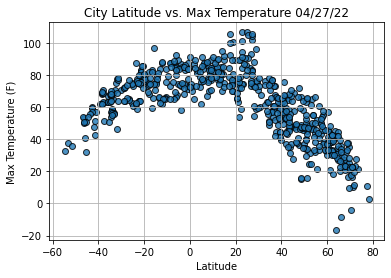

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

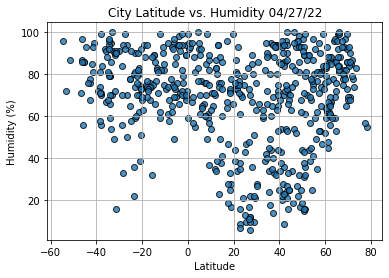

In [65]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

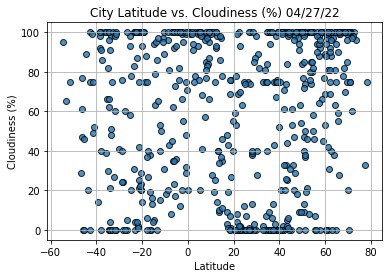

In [66]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

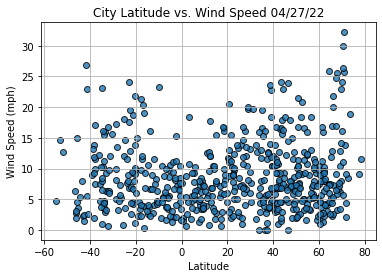

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [68]:
#6.4.1
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [70]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2022-04-27 06:03:13
Lat                       19.7297
Lng                       -155.09
Max Temp                    76.28
Humidity                       99
Cloudiness                     55
Wind Speed                   6.04
Name: 13, dtype: object

In [72]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
574     True
575     True
576     True
577     True
578     True
Name: Lat, Length: 579, dtype: bool

In [73]:
# .head() get first 5 rows
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Evensk,RU,2022-04-27 06:03:09,61.9500,159.2333,31.33,88,98,1.32
2,Barrow,US,2022-04-27 06:01:02,71.2906,-156.7887,10.42,85,100,13.80
3,Kahului,US,2022-04-27 06:03:09,20.8947,-156.4700,75.85,87,53,11.01
4,Tuktoyaktuk,CA,2022-04-27 06:03:10,69.4541,-133.0374,9.46,99,96,6.24
7,Chambersburg,US,2022-04-27 05:59:00,39.9376,-77.6611,39.78,86,52,11.97


In [77]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


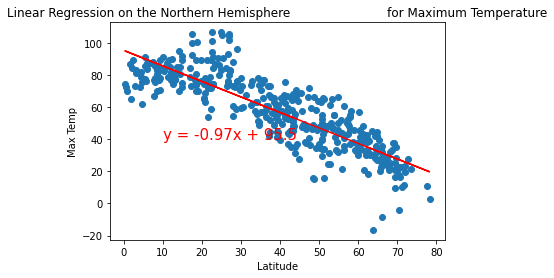

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

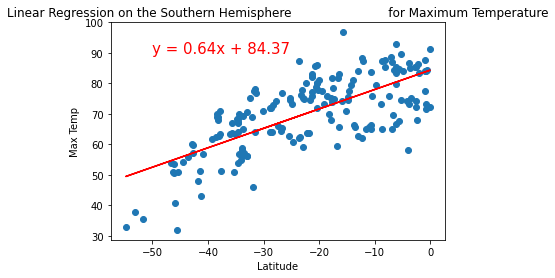

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

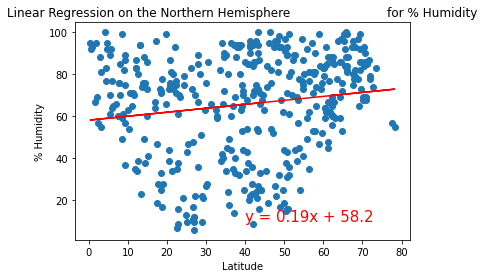

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

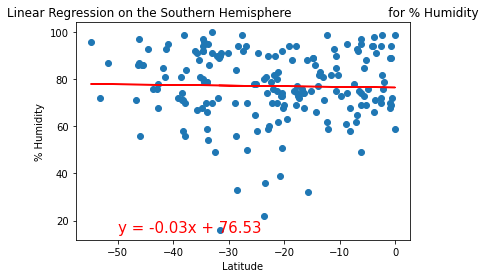

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

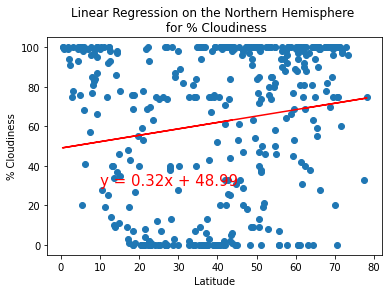

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,30))

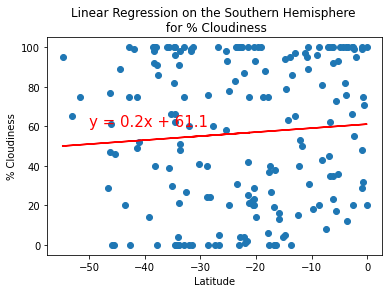

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

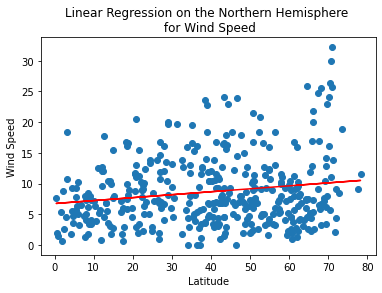

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

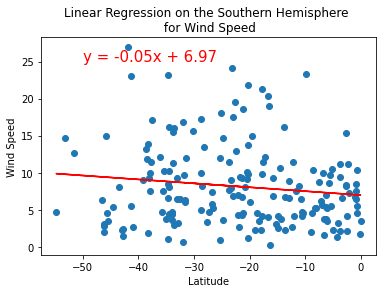

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))